In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
%matplotlib inline

In [11]:
df=pd.read_csv("diabetes.csv")
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetes,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


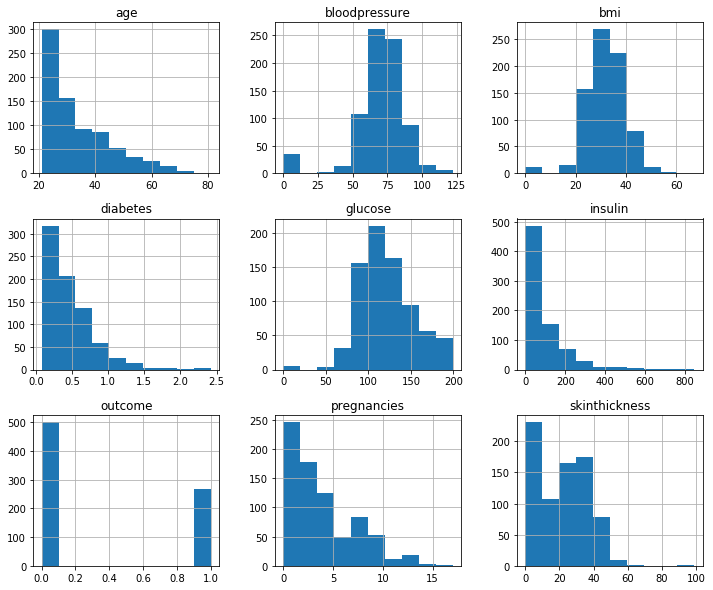

In [14]:
_ = df.hist(figsize=(12, 10)) #figsize(Box's length and breadth)
# age bloodpressure..all these features are present in x axis
# y axis describes the no. of people of that range

In [16]:
# To see the correlations beytween each feature we import seaborn
import seaborn as sns

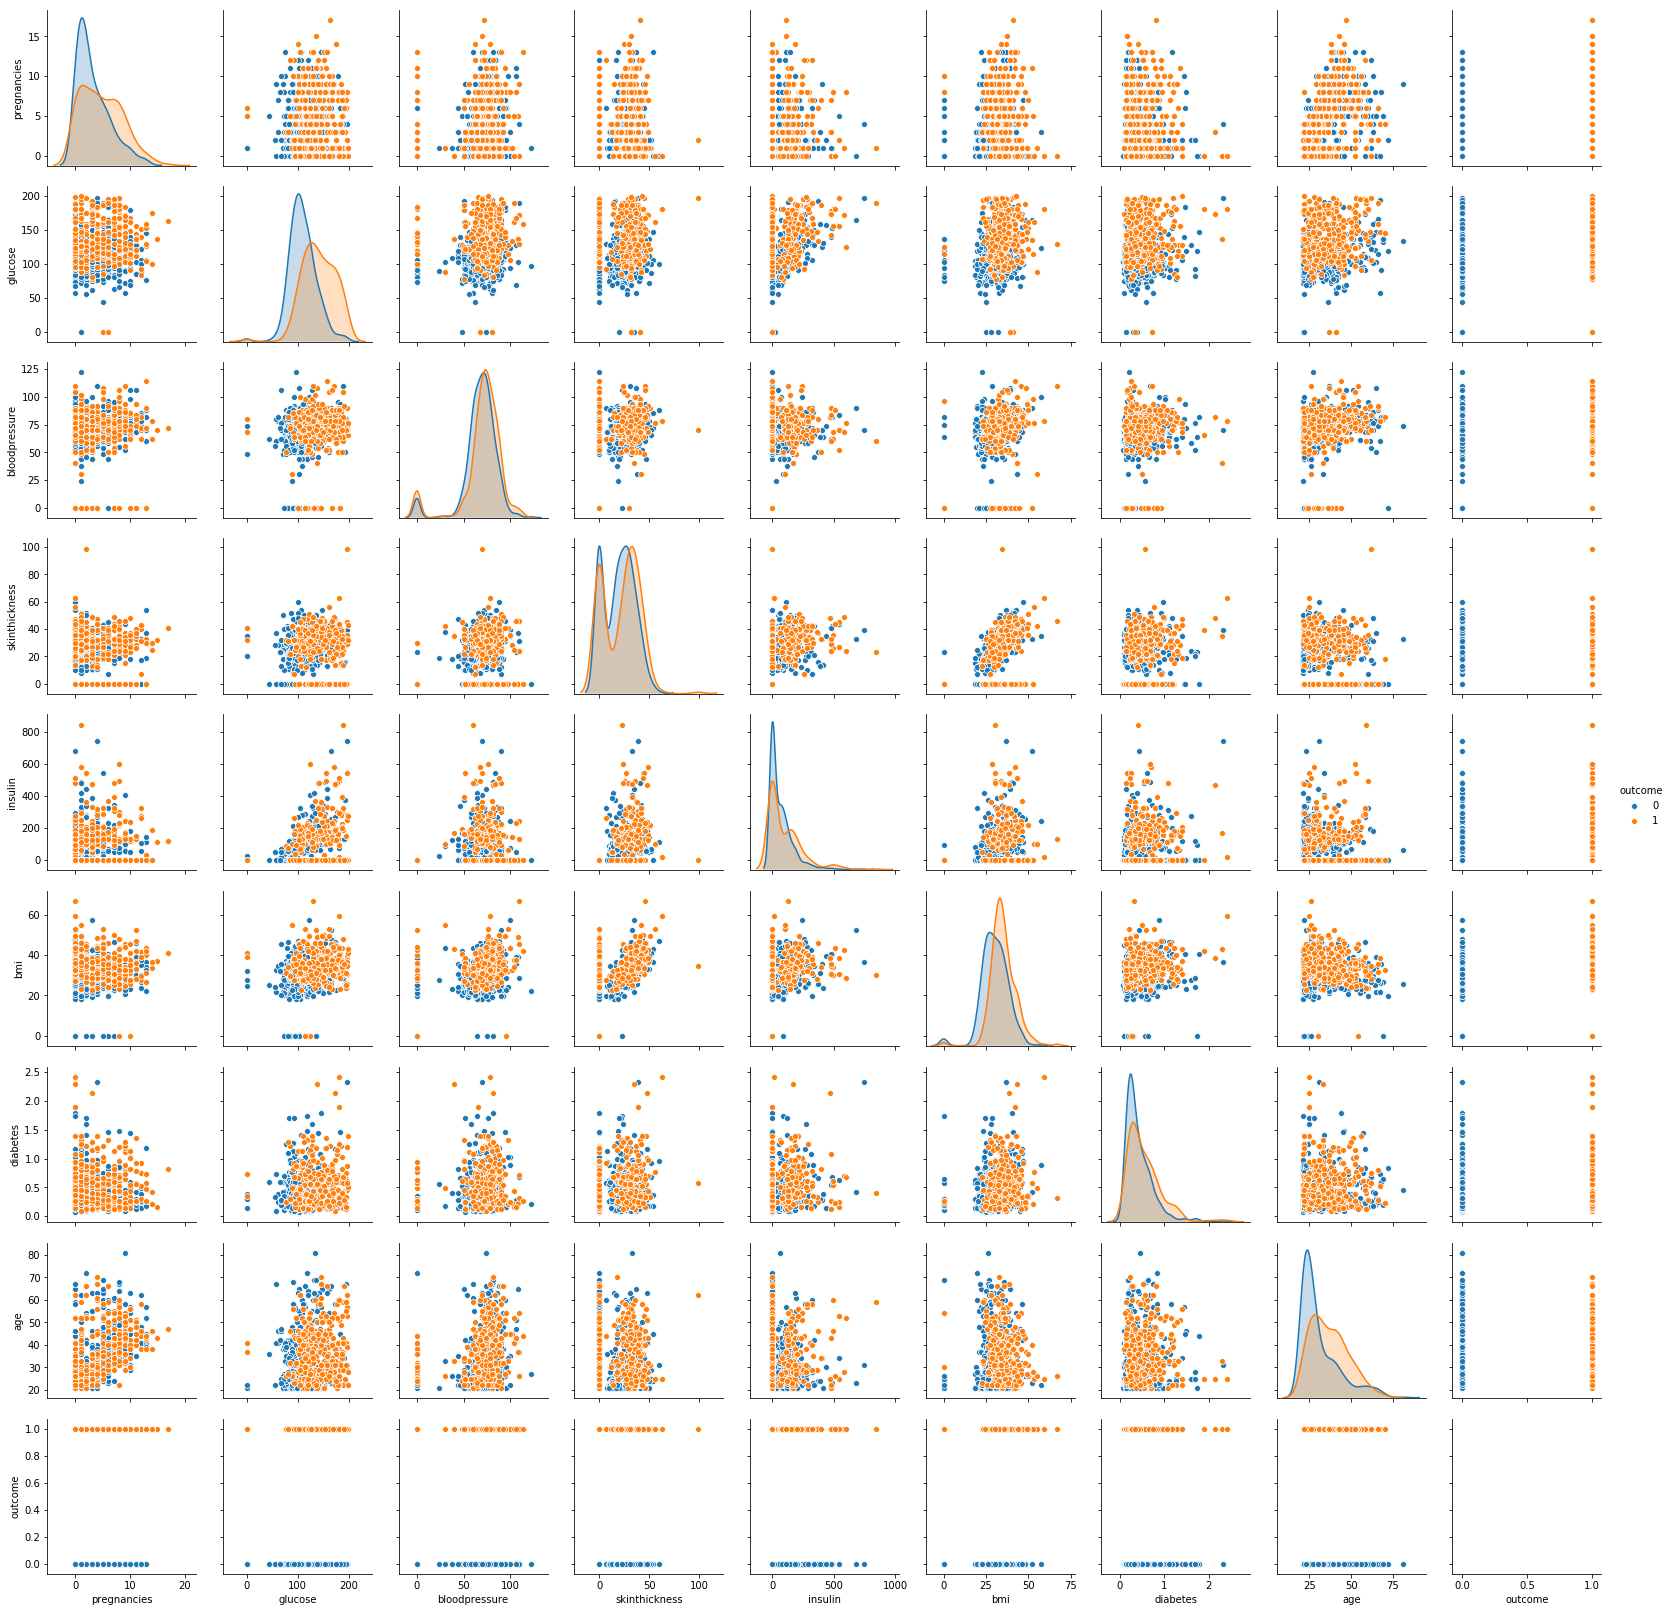

In [18]:
a=sns.pairplot(df,hue='outcome')# use vars argument to see plt between any features..This is giving all plots so diminished..use as below

C:\Users\hp\Anaconda1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


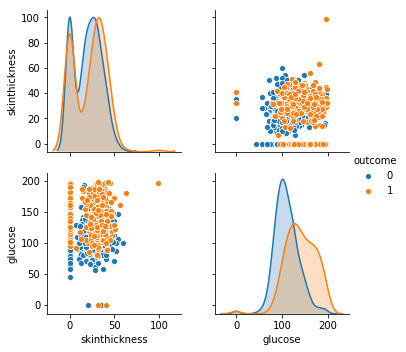

In [20]:
sns.pairplot(df,hue='outcome',vars=["skinthickness","glucose"])#use vars and see clearly

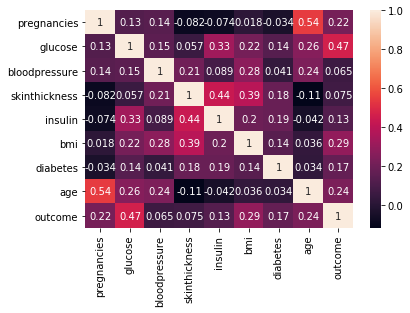

In [21]:
sns.heatmap(df.corr(),annot=True) #this heatmap shows correlation between featues
#like pregnancy is related to age by 0.54

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies      768 non-null int64
glucose          768 non-null int64
bloodpressure    768 non-null int64
skinthickness    768 non-null int64
insulin          768 non-null int64
bmi              768 non-null float64
diabetes         768 non-null float64
age              768 non-null int64
outcome          768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
df.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetes,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Scaling

In [24]:
#Subtract mean from each data and divide by standard deviation

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
from keras.utils import to_categorical

In [28]:
sc=StandardScaler()
x=sc.fit_transform(df.drop('outcome',axis=1))
y=df['outcome'].values
y_cat=to_categorical(y)

C:\Users\hp\Anaconda1\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda1\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [29]:
y_cat

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y_cat,random_state=22,test_size=0.2)

In [32]:
from keras .models import Sequential
from keras .layers import Dense
from keras.optimizers import Adam

In [38]:
model=Sequential()
model.add(Dense(32,input_shape=(8,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(Adam(lr=0.05),
              loss='binary_crossentropy',
              metrics=['accuracy'])
#if softmax activation function then categorical_classification

In [39]:
model.fit(x_train, y_train, epochs=20, verbose=2, validation_split=0.1)#verbose allow each step result to be show..Multithread

Train on 552 samples, validate on 62 samples
Epoch 1/20
 - 1s - loss: 0.5238 - acc: 0.7418 - val_loss: 0.5638 - val_acc: 0.7581
Epoch 2/20
 - 0s - loss: 0.4879 - acc: 0.7844 - val_loss: 0.5087 - val_acc: 0.8226
Epoch 3/20
 - 0s - loss: 0.4746 - acc: 0.7926 - val_loss: 0.5502 - val_acc: 0.7903
Epoch 4/20
 - 0s - loss: 0.4625 - acc: 0.7917 - val_loss: 0.5980 - val_acc: 0.7661
Epoch 5/20
 - 0s - loss: 0.4603 - acc: 0.7962 - val_loss: 0.6219 - val_acc: 0.8065
Epoch 6/20
 - 0s - loss: 0.4519 - acc: 0.7862 - val_loss: 0.5246 - val_acc: 0.7661
Epoch 7/20
 - 0s - loss: 0.4266 - acc: 0.8016 - val_loss: 0.5239 - val_acc: 0.7903
Epoch 8/20
 - 0s - loss: 0.4235 - acc: 0.7998 - val_loss: 0.4852 - val_acc: 0.7984
Epoch 9/20
 - 0s - loss: 0.4045 - acc: 0.8161 - val_loss: 0.6238 - val_acc: 0.7903
Epoch 10/20
 - 0s - loss: 0.3950 - acc: 0.8089 - val_loss: 0.6660 - val_acc: 0.7823
Epoch 11/20
 - 0s - loss: 0.4097 - acc: 0.7998 - val_loss: 0.4899 - val_acc: 0.7581
Epoch 12/20
 - 0s - loss: 0.3983 - acc: 

In [40]:
y_pred=model.predict(x_test)

In [41]:
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [43]:
accuracy_score(y_test_class,y_pred_class)

0.7142857142857143

In [44]:
print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       100
           1       0.67      0.37      0.48        54

   micro avg       0.71      0.71      0.71       154
   macro avg       0.70      0.64      0.64       154
weighted avg       0.71      0.71      0.69       154



In [45]:
confusion_matrix(y_test_class,y_pred_class)

array([[90, 10],
       [34, 20]], dtype=int64)